In [3]:
!pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 12.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=ee09c0ef59c4181d85629fa22422e03e637c5aca64512976609f5ae5923fd077
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_data=yf.download('AAPL', start='2024-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532074,187.315366,182.792518,186.033057,82488700
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500
2024-01-04,180.824371,181.997322,179.800520,181.062929,71983600
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500


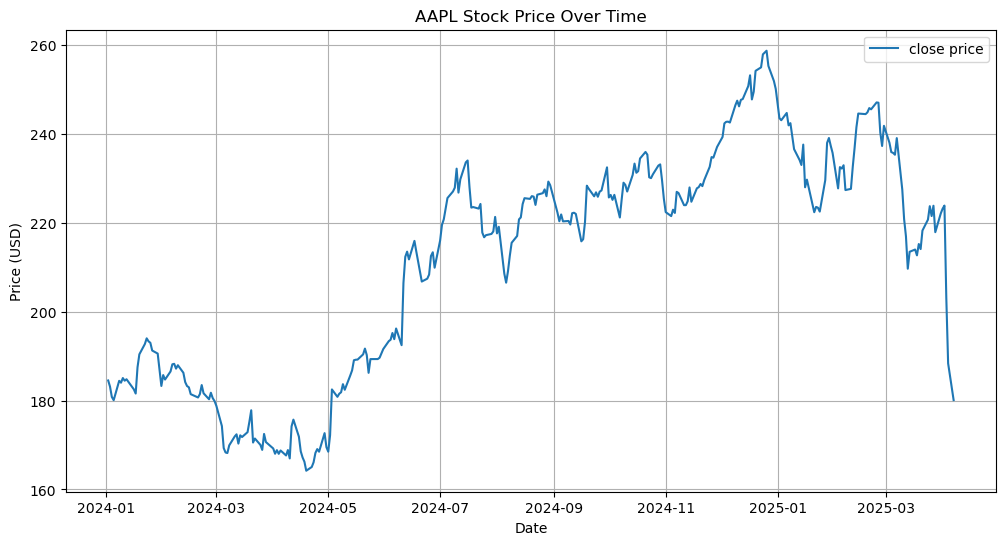

In [7]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='close price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Classical Time Series Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive=seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [11]:
trend_additive=decomposition_additive.trend
seasonal_additive=decomposition_additive.seasonal
residual_additive=decomposition_additive.resid

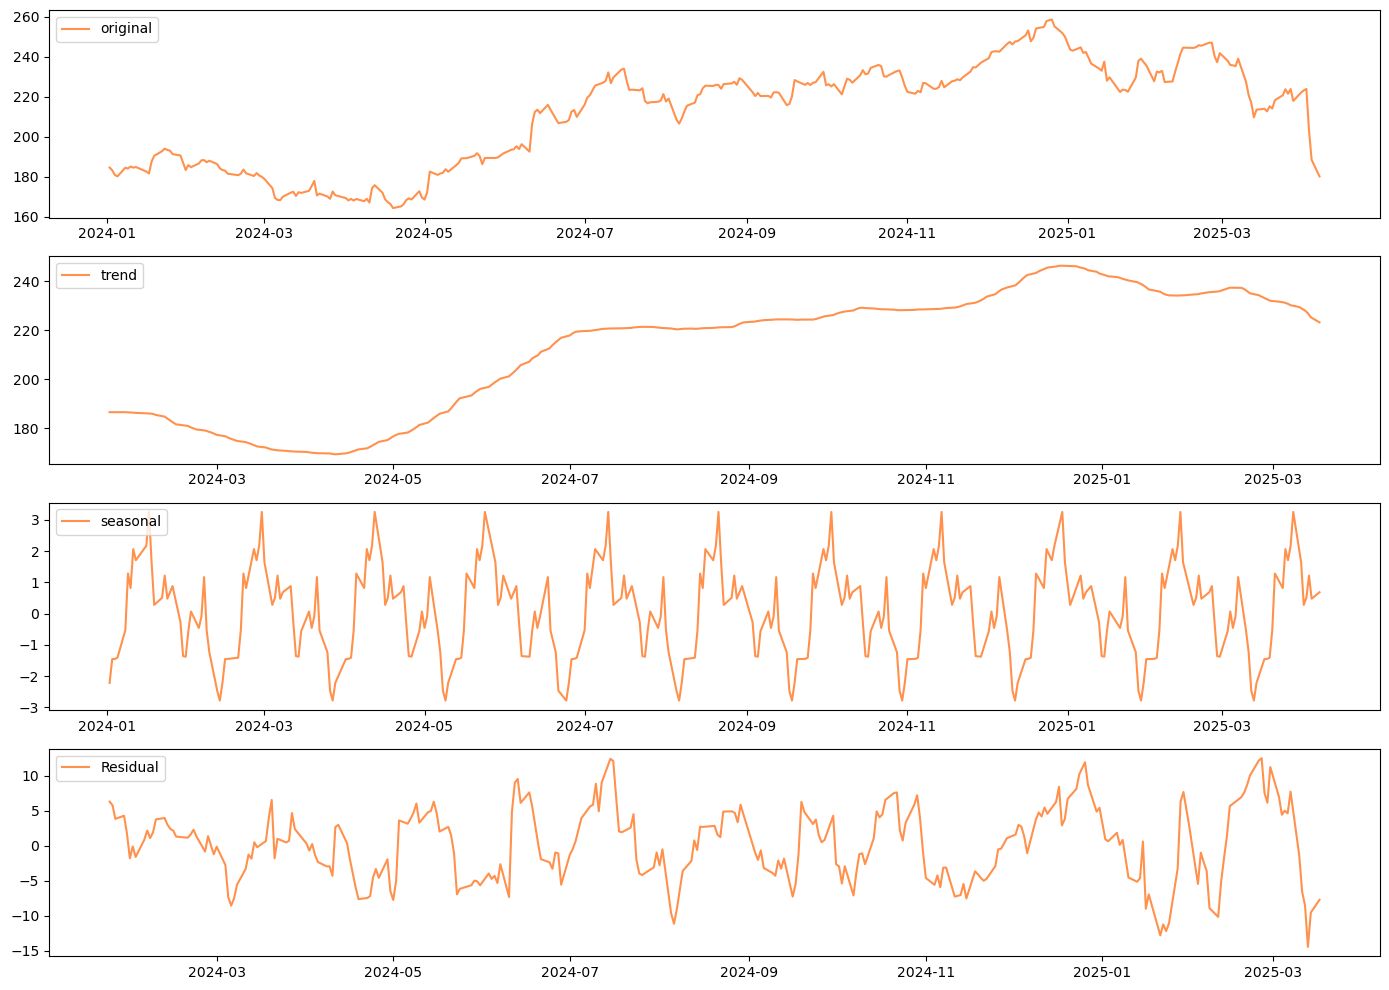

In [12]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

STL Decomposition

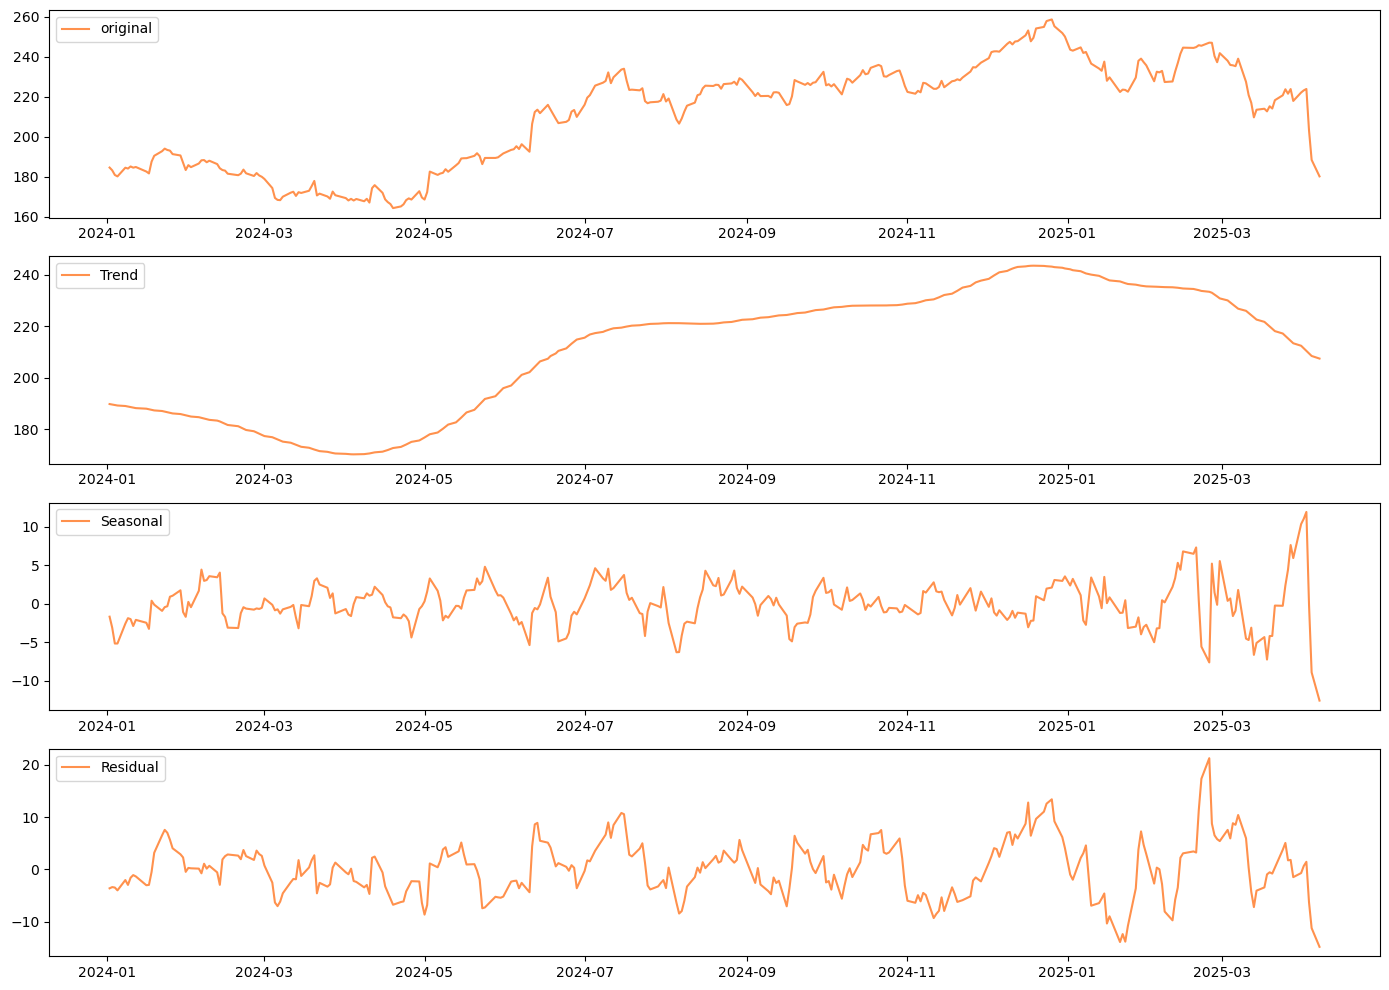

In [17]:
from statsmodels.tsa.seasonal import STL


## Perform STL decomposition 
stl=STL(stock_data['Close'], period=30)
result=stl.fit()

## Plot the decomposition components

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed, label='original', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#FF914D')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Stationarity Test

In [20]:
from statsmodels.tsa.stattools import adfuller


## perform the Augmented Dicky-fuller test
adf_test=adfuller(stock_data['Close'])

print("ADF test Results:")
print(f'ADF Statistics :{round(adf_test[0], 3)}')
print(f'p-values :{round(adf_test[1],3)}')
print("Critical Values")

for key, value in adf_test[4].items():
    print(f'{key}:{round(value,3)}')

ADF test Results:
ADF Statistics :-1.365
p-values :0.599
Critical Values
1%:-3.451
5%:-2.871
10%:-2.572


In [22]:
from statsmodels.tsa.stattools import kpss

## Perform the KPSS test

kpss_test=kpss(stock_data['Close'], regression='ct') ## "c" for constant (level stationarity) 'ct' for trend

print("Kpss Test Result")
print(f"KPSS Statistics:{round(kpss_test[0]),2}")
print(f"p-value: {kpss_test[1]}")
print("Critical Value")
for key, value in kpss_test[3].items():
    print(f"{key}:{value}")

Kpss Test Result
KPSS Statistics:(0, 2)
p-value: 0.01
Critical Value
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


C:\Users\Admin\AppData\Local\Temp\ipykernel_12328\1241244699.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(stock_data['Close'], regression='ct') ## "c" for constant (level stationarity) 'ct' for trend


In [24]:
from statsmodels.tsa.stattools import kpss


## perform the Augmented Dicky-fuller test
kpss_test=adfuller(stock_data['Close'], regression='ct')

print("kpss test Results:")
print(f'kpss Statistics :{round(kpss_test[0], 2)}')
print(f'p-values :{round(kpss_test[1],3)}')
print("Critical Values")

for key, value in kpss_test[4].items():
    print(f'{key}:{round(value,3)}')

kpss test Results:
kpss Statistics :-0.27
p-values :0.99
Critical Values
1%:-3.988
5%:-3.425
10%:-3.135


<Figure size 1400x600 with 0 Axes>

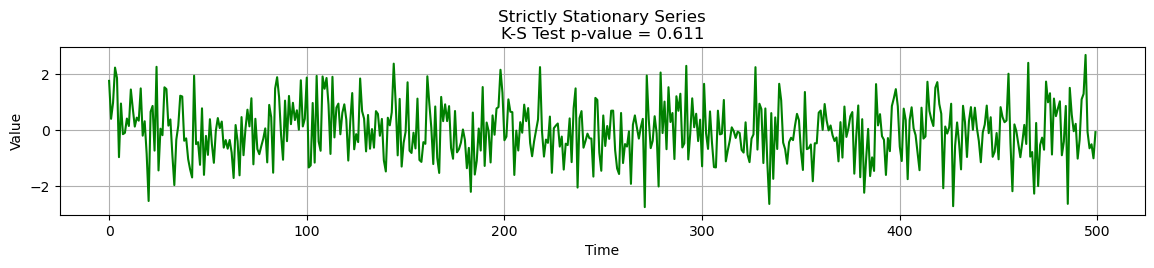

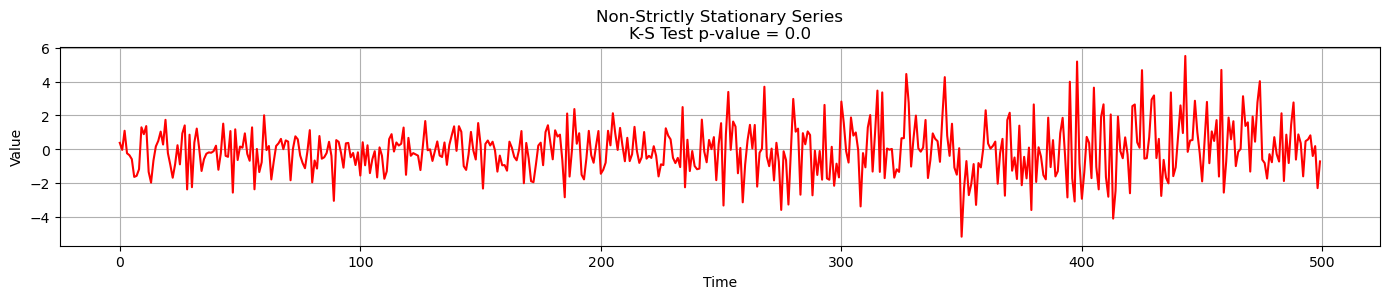

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

## Generating Synthetic Data For demonstration

np.random.seed(0)
n=500

## Strict stationary series :: normally distributed noise
strict_stationary_series=np.random.normal(0,1,n)

### non-strictly stationary series: changing varience
non_strict_stationary_series=np.concatenate([
    np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2)
])

## Function to split the series into two halves and perform the k-s test
def ks_test_stationary(series):
    split=len(series)//2
    series_first_half=series[:split]
    series_second_half=series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

## perform the k-s test on strictly stationary series
ks_test_strict, ks_pvalue_strict=ks_test_stationary(strict_stationary_series)

## perform the k-s test on non-strictly stationary seriees
ks_test_non_strict, ks_pvalue_non_strict=ks_test_stationary(non_strict_stationary_series)

## plotting the series
plt.figure(figsize=(14,6))


# Plot strict stationary
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(strict_stationary_series, color='green')
plt.title(f'Strictly Stationary Series\nK-S Test p-value = {round(ks_pvalue_strict, 3)}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

# Plot non-strict stationary
plt.figure(figsize=(14,10))
plt.subplot(412)
plt.plot(non_strict_stationary_series, color='red')
plt.title(f'Non-Strictly Stationary Series\nK-S Test p-value = {round(ks_pvalue_non_strict, 3)}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()

Making A data Stationary

In [29]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test Function
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics:", result[0])
    print("p-value:", result[1])
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {round(value, 3)}")

# KPSS Test Function
def kpss_test(series):
    result = kpss(series, regression='c')
    print("KPSS Statistics:", result[0])
    print("p-value:", result[1])
    for key, value in result[3].items():  # For KPSS, critical values are at index 3
        print(f"Critical Value ({key}): {round(value, 3)}")

# Run the tests on your stock closing prices
prices = stock_data['Close']


In [31]:
print("=== ADF TEST ===")
adf_test(prices)

=== ADF TEST ===
ADF Statistics: -1.3645638799522353
p-value: 0.599141867072514
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


In [33]:
prices

Ticker,AAPL
Date,
2024-01-02,184.532074
2024-01-03,183.150375
2024-01-04,180.824371
2024-01-05,180.098694
2024-01-08,184.452560
...,...
2025-04-01,223.190002
2025-04-02,223.889999
2025-04-03,203.190002


In [35]:
prices.diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.381699
2024-01-04,-2.326004
2024-01-05,-0.725677
2024-01-08,4.353867
...,...
2025-04-01,1.059998
2025-04-02,0.699997
2025-04-03,-20.699997


In [37]:
prices.diff().diff()  ## second order transformation

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.944305
2024-01-05,1.600327
2024-01-08,5.079544
...,...
2025-04-01,-3.170013
2025-04-02,-0.360001
2025-04-03,-21.399994


In [39]:
print("\n=== KPSS TEST ===")
kpss_test(prices)


=== KPSS TEST ===
KPSS Statistics: 2.103312287002997
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_12328\38753297.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


Transformation

In [42]:
import numpy as np
from scipy import stats

## Log Transformation 
prices_log=np.log(prices)

## Square root transformation
prices_sqrt=np.sqrt(prices)

## Box Cox Transformation
# note -- Box Cox requires all positive values

##prices_boxcox= lan=stats.boxcox(prices[prices>0])

In [44]:
prices_log

Ticker,AAPL
Date,
2024-01-02,5.217823
2024-01-03,5.210308
2024-01-04,5.197526
2024-01-05,5.193505
2024-01-08,5.217392
...,...
2025-04-01,5.408023
2025-04-02,5.411155
2025-04-03,5.314142


In [46]:
prices_sqrt

Ticker,AAPL
Date,
2024-01-02,13.584258
2024-01-03,13.533306
2024-01-04,13.447095
2024-01-05,13.420085
2024-01-08,13.581331
...,...
2025-04-01,14.939545
2025-04-02,14.962954
2025-04-03,14.254473


In [48]:
adf_test(prices_sqrt)

ADF Statistics: -1.3460254560162772
p-value: 0.6078616024606143
Critical Value (1%): -3.451
Critical Value (5%): -2.871
Critical Value (10%): -2.572


from scipy import signal

## using linear trend
trend=np.polyfit(np.arange(len(prices)), prices, 1)
trendline=np.polyval(trend, np.arange(len(prices)))
prices_detrended= prices - trendline

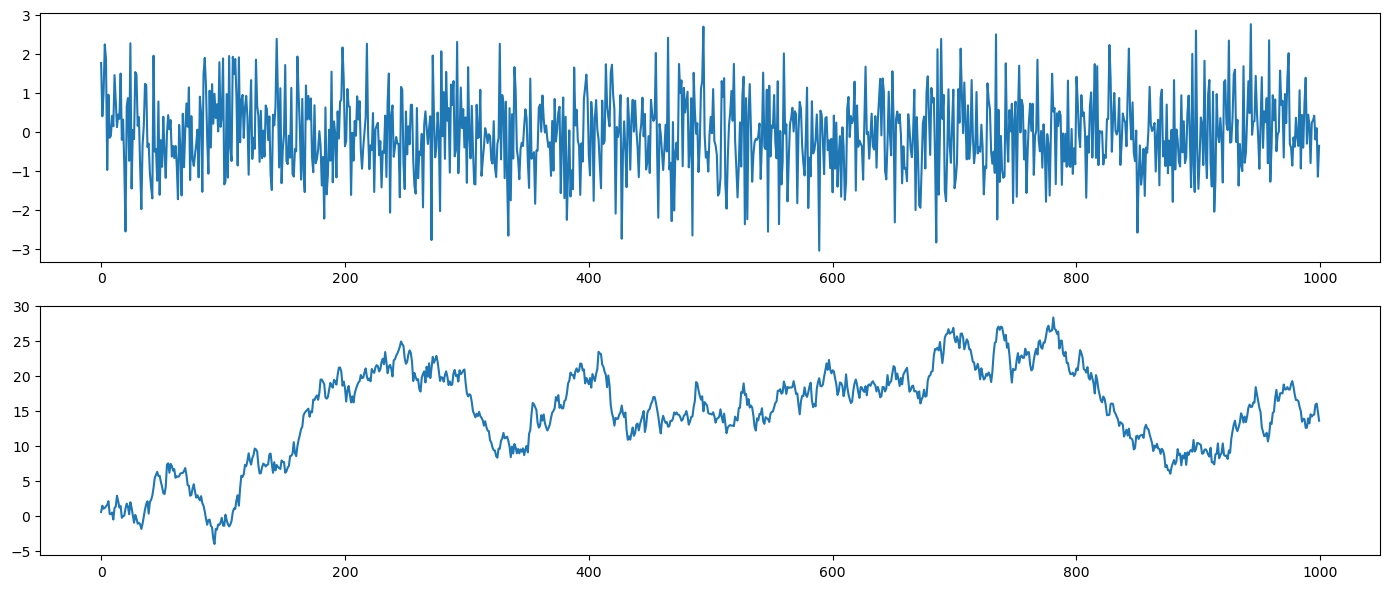

\Ljung box test for whitw noise :
      lb_stat  lb_pvalue
10  14.025574   0.171828
\Ljung box test for Random Walk :
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

## Generating a white noise and random walk for companies
np.random.seed(0)
n=1000

# white noise
white_noise=np.random.normal(0,1,n)

## Random Walk
random_shocks=np.random.normal(0,1,n)
random_walk=np.cumsum(random_shocks)

## Plotting series
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
plt.plot(white_noise)

plt.subplot(2,1,2)
plt.plot(random_walk)

plt.tight_layout()
plt.show()


### Ljung box test
print("\Ljung box test for whitw noise :")
lb_test_white_noise=acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

print("\Ljung box test for Random Walk :")
lb_test_random_walk=acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)